<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [92]:
# Librerias
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [93]:

# Cargar el dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=25)

# Crear la carpeta 'data'
data_folder = 'data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Guardar cada imagen en la carpeta 'data'
for i, image in enumerate(lfw_dataset.images):
    plt.imsave(os.path.join(data_folder, f'image_{i}.jpg'), image, cmap='gray')

print(f"Imágenes guardadas en la carpeta '{data_folder}'")

Imágenes guardadas en la carpeta 'data'


Para llamar los datos se creo una carpeta llamada 'data' y se importo la libreria 'fetch_lfw_people' filtrando solo los individuos que tenian al menos 25 imagenes.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [94]:
lfw_dataset.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\nhttp://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\nimple

In [95]:
# Extraer las dimensiones de las imágenes y otras propiedades del dataset
n_images = lfw_dataset.images.shape[0]
image_height = lfw_dataset.images.shape[1]
image_width = lfw_dataset.images.shape[2]
n_features = lfw_dataset.data.shape[1]
n_classes = len(lfw_dataset.target_names)

# Imprimir la descripción del dataset
print(f"Número de imágenes: {n_images}")
print(f"Dimensiones de cada imagen: {image_height}x{image_width} píxeles")
print(f"Número de características por imagen (píxeles): {n_features}")
print(f"Número de clases: {n_classes}")

# Información adicional sobre la distribución de clases
unique, counts = np.unique(lfw_dataset.target, return_counts=True)
print("Distribución de número de imágenes por persona:")
print(dict(zip(lfw_dataset.target_names[unique], counts)))


Número de imágenes: 2588
Dimensiones de cada imagen: 62x47 píxeles
Número de características por imagen (píxeles): 2914
Número de clases: 42
Distribución de número de imágenes por persona:
{'Alejandro Toledo': 39, 'Alvaro Uribe': 35, 'Andre Agassi': 36, 'Ariel Sharon': 77, 'Arnold Schwarzenegger': 42, 'Bill Clinton': 29, 'Colin Powell': 236, 'David Beckham': 31, 'Donald Rumsfeld': 121, 'George W Bush': 530, 'Gerhard Schroeder': 109, 'Gloria Macapagal Arroyo': 44, 'Gray Davis': 26, 'Guillermo Coria': 30, 'Hans Blix': 39, 'Hugo Chavez': 71, 'Jack Straw': 28, 'Jacques Chirac': 52, 'Jean Chretien': 55, 'Jennifer Capriati': 42, 'John Ashcroft': 53, 'John Negroponte': 31, 'Juan Carlos Ferrero': 28, 'Junichiro Koizumi': 60, 'Kofi Annan': 32, 'Laura Bush': 41, 'Lleyton Hewitt': 41, 'Luiz Inacio Lula da Silva': 48, 'Mahmoud Abbas': 29, 'Megawati Sukarnoputri': 33, 'Nestor Kirchner': 37, 'Recep Tayyip Erdogan': 30, 'Ricardo Lagos': 27, 'Roh Moo-hyun': 32, 'Rudolph Giuliani': 26, 'Serena Williams

Se extraen las dimensiones y demas propiedades de la base, lo que nos lleva a ver que la base filtrada cuenta con 2588 imagenes, la dimensión de cada imagen es de 62x47 pixeles y el numero de clase son 42 

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

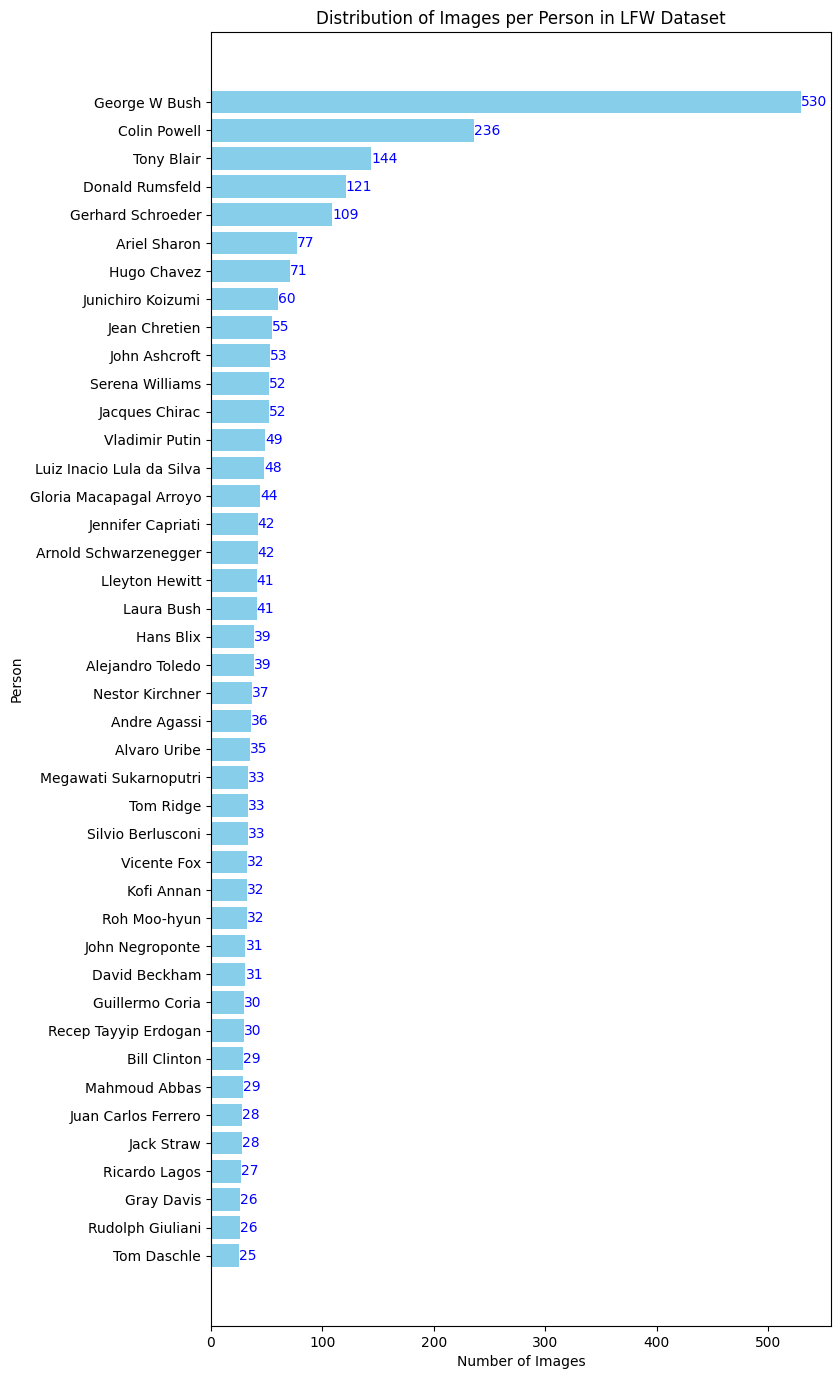

In [96]:
# Crear una Serie para contar imágenes por persona
target_counts = pd.Series(lfw_dataset.target).value_counts().sort_index()
person_names = pd.Series(lfw_dataset.target_names)

# Crear un DataFrame con los nombres de las personas y el número de imágenes
df_counts = pd.DataFrame({
    'Person': person_names[target_counts.index],
    'Image Count': target_counts.values
})

# Ordenar el DataFrame por el número de imágenes
df_counts = df_counts.sort_values(by='Image Count', ascending=True)

# Gráfico de barras horizontal con etiquetas
plt.figure(figsize=(8, max(6, 0.4 * len(df_counts))))  # Ajustar el tamaño vertical según el número de personas
bars = plt.barh(df_counts['Person'], df_counts['Image Count'], color='skyblue')

# Añadir etiquetas a cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', color='blue', fontsize=10)

plt.xlabel('Number of Images')
plt.ylabel('Person')
plt.title('Distribution of Images per Person in LFW Dataset')
plt.show()


Se crea una serie que cuenta la cantidad de imagenes por individuo y luego se crea un grafico que permita conocer la distribución de estos, vemos que solo 8 personas cuentan con más de 25 imagenes en el dataset y quien contiene la mayor cantidad de imagenes es George W Bush 

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Número de imágenes de Serena Williams: 52


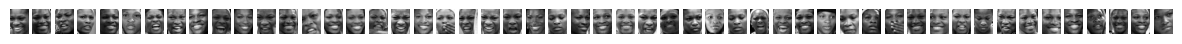

In [97]:

# Encuentra el índice para Serena Williams
serena_index = [i for i, name in enumerate(lfw_dataset.target_names) if "Serena Williams" in name]

if serena_index:
    serena_images = lfw_dataset.images[lfw_dataset.target == serena_index[0]]

    # Contar las imágenes
    print(f"Número de imágenes de Serena Williams: {len(serena_images)}")

    # Mostrar las imágenes
    fig, axes = plt.subplots(1, len(serena_images), figsize=(15, 5))
    for ax, img in zip(axes, serena_images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()
else:
    print("No hay imagenes.")


Se hacen filtros donde se buscan y grafican las imagenes de Serena Williams, donde se evidencia que la base cuenta con 52 imagenes que perteneces a ella

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

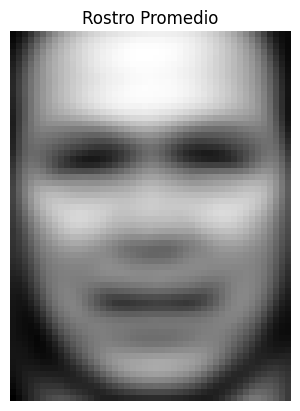

In [98]:

# Obtener la matriz de imágenes y calcular el rostro promedio
# Las imágenes están en lfw_dataset.images y tienen forma (n_imagenes, altura, anchura)
# Necesitas cambiar la forma a (n_imagenes, altura*anchura) para hacer el promedio por columna
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)

# Cambiar la forma del rostro promedio para hacerlo compatible con imshow
face_average_image = face_average.reshape(height, width)

# Mostrar el rostro promedio
plt.imshow(face_average_image, cmap='gray')
plt.title("Rostro Promedio")
plt.axis('off')  # Ocultar los ejes
plt.show()


Para encontrar el rostro promedios se extrae la matriz de imágenes y se redimensiona para simplificar los cálculos matemáticos, para luego calcular el rostro promedio tomando el promedio de cada píxel a través de todas las imágenes y por ultimo se muestra esta imagen promedio utilizando matplotlib, proporcionando una representación visual de las características faciales comunes.

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

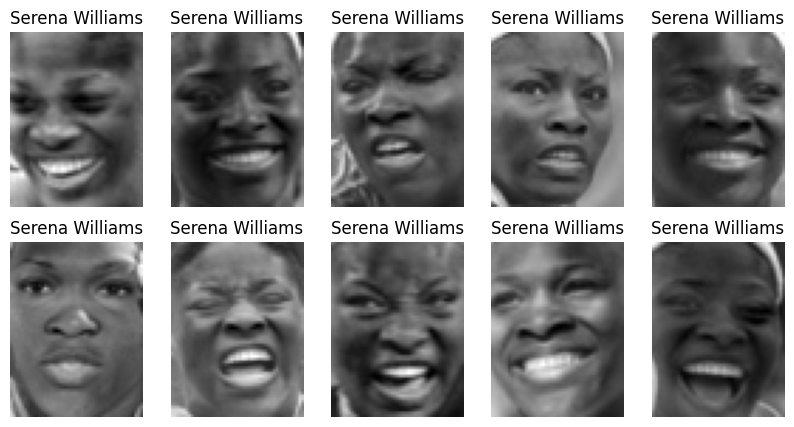

In [99]:
# Cargar el dataset con un filtro para incluir solo a Serena Williams
serena_indices = np.where(lfw_dataset.target_names == 'Serena Williams')[0]
serena_images = lfw_dataset.images[lfw_dataset.target == serena_indices[0]]

# Calcular el rostro promedio del dataset completo
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)  # Convertir imágenes a vectores
face_average = X.mean(axis=0)  # Promedio de cada columna

# Restar el rostro promedio de las imágenes de Serena Williams
X_serena = serena_images.reshape(serena_images.shape[0], height * width)
X_centered_serena = X_serena - face_average

# Volver a dar forma a las imágenes centradas para visualización
images_centered_serena = X_centered_serena.reshape(X_centered_serena.shape[0], height, width)

# Mostrar las imágenes centradas de Serena Williams
plt.figure(figsize=(10, 5))
for i in range(min(10, images_centered_serena.shape[0])):  # Mostrar hasta las primeras 10 imágenes centradas
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_centered_serena[i], cmap='gray')
    plt.title('Serena Williams')
    plt.axis('off')
plt.show()

Para este punto se calculó el rostro promedio basándose en todas las imágenes disponibles donde se seleccionaron específicamente las imágenes de Serena Williams y se les restó el rostro promedio para centralizar los datos, destacando así las características únicas de sus imágenes en comparación con el promedio general y finalmente se grafican 

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [100]:
# Calcular el rostro promedio y centrar las imágenes
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)
X_centered = X - face_average

# Aplicar SVD a las imágenes centradas
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Retener los primeros K=1000 valores singulares
K = 1000
S_k = S[:K]

# Calcular la proporción de la varianza explicada por los primeros K valores singulares
total_variance = np.sum(S**2)
explained_variance_k = np.sum(S_k**2)
proportion_variance_explained = explained_variance_k / total_variance

proportion_variance_explained


0.9978761


EL resultado de calcular la proporción de la varianza explicada por los primeros 1000 valores singulares es muy significativo, este número indica que el 99.79% de la variabilidad total en las imágenes del dataset se conserva incluso después de reducir la dimensionalidad a los primeros 1000 componentes principales.

Esto confirma la capacidad para mantener la esencia de las imágenes originales con gran precisión. Aunque las reconstrucciones son en general muy similares a las originales, se menciona que existen pequeñas discrepancias, especialmente en los detalles más sutiles, atribuibles a la pérdida de información inherente al descartar los valores singulares menos significativos. En conclusión, se subraya la utilidad de la SVD en la reducción de dimensionalidad de imágenes faciales, permitiendo una reconstrucción eficiente sin sacrificar detalles críticos, lo que subraya su potencial en aplicaciones que requieren compresión de datos o simplificación de características sin perder contenido relevante.

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

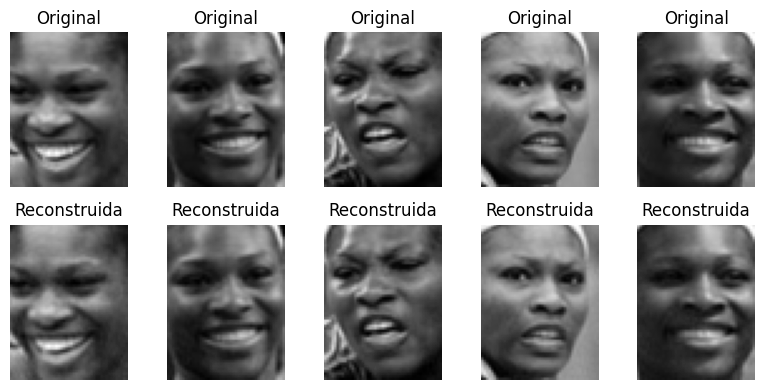

In [101]:
# Retener los primeros K=1000 componentes
K = 1000
U_k = U[:, :K]
S_k = S[:K]
Vt_k = Vt[:K, :]

# Encontrar las imágenes de Serena Williams
serena_indices = [i for i, name in enumerate(lfw_dataset.target_names) if "Serena Williams" in name]
serena_images = X[lfw_dataset.target == serena_indices[0]]  # Imágenes originales
serena_images_centered = X_centered[lfw_dataset.target == serena_indices[0]]

# Reconstruir las imágenes de Serena Williams usando los K componentes
serena_images_reconstructed = np.dot(serena_images_centered.dot(Vt_k.T), Vt_k) + face_average

# Visualizar las imágenes originales y reconstruidas de Serena Williams
plt.figure(figsize=(8, 4))
for i in range(min(len(serena_images), 5)):  # Mostrar solo las primeras 5 imágenes
    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(serena_images[i].reshape(height, width), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Imagen reconstruida
    plt.subplot(2, 5, i + 6)
    plt.imshow(serena_images_reconstructed[i].reshape(height, width), cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()


Se filtraron específicamente las imágenes de Serena Williams, aplicando los componentes principales retenidos para reconstruir estas imágenes y aproximándolas utilizando la información condensada, luego se grafica y comparan las imágenes originales vs las reconstruidas de Serena Williams, demostrando cómo funcionan las eigenfaces.

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

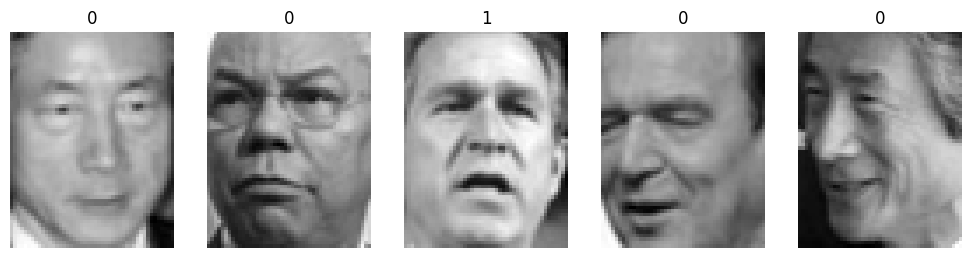

In [102]:
# Obtener los nombres de las personas en el dataset
target_names = lfw_dataset.target_names

# Crear la variable binaria: 1 si la imagen es de George W Bush, 0 en caso contrario
is_george_bush = np.where(lfw_dataset.target_names[lfw_dataset.target] == 'George W Bush', 1, 0)

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Seleccionar índices aleatorios para visualización
indices = np.random.choice(range(len(lfw_dataset.images)), size=5, replace=False)

# Configurar la figura para mostrar las imágenes
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lfw_dataset.images[idx], cmap='gray')
    plt.title('1' if is_george_bush[idx] == 1 else '0')
    plt.axis('off')
plt.tight_layout()
plt.show()

Se crea la variable binaria donde se identifican los rostros de George W Bush con el numero 1 y 0 para las que no, se grafican algunos ejemplos para ver si funciona correctamente

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [103]:
from sklearn.model_selection import train_test_split

# Cargar el dataset
is_george_bush = np.where(lfw_dataset.target_names[lfw_dataset.target] == 'George W Bush', 1, 0)

# Preparar los datos
X = lfw_dataset.data  # imágenes aplanadas
y = is_george_bush    # etiquetas binarias

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10101)

# Verificar las dimensiones
print("Dimensiones train:", X_train.shape, y_train.shape)
print("Dimensiones test:", X_test.shape, y_test.shape)

Dimensiones train: (2070, 2914) (2070,)
Dimensiones test: (518, 2914) (518,)


Se divide la base anterior, se preparan las imagenes con las etiquetas binarias y aplanadas, luego se divide la base en dtos de prueba y entrenamiento para finalmente obtener Dimensiones train: (2070, 2914) (2070,) y Dimensiones test: (518, 2914) (518,)

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [108]:
from numpy.linalg import svd

# Centrar los datos
mean_train = X_train.mean(axis=0)
X_train_centered = X_train - mean_train
X_test_centered = X_test - mean_train

# Aplicar SVD
U_train, S_train, Vt_train = svd(X_train_centered, full_matrices=False)

# Transformar el conjunto de prueba usando la matriz Vt obtenida del entrenamiento
X_test_svd = X_test_centered.dot(Vt_train.T)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [109]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Suponemos que X_train_centered y X_test_centered ya están definidos

# Realizar SVD y seleccionar los primeros 1000 componentes
svd = TruncatedSVD(n_components=1000, random_state=10101)
X_train_svd = svd.fit_transform(X_train_centered)
X_test_svd = svd.transform(X_test_centered)

# Configuración del modelo de regresión logística
model = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento transformados
model.fit(X_train_svd, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred = model.predict(X_test_svd)

# Calcular la precisión específica para imágenes de George W Bush
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el rendimiento del modelo
print(f"Imágenes de George W Bush clasificadas correctamente es: {accuracy * 100:.2f}%")


Accuracy: 0.9690215338118625
El porcentaje de imágenes de George W Bush clasificadas correctamente es: 96.90%


Se estima el modelo logistico con las especificaciones donde para estimar el modelo logístico se utilizo el solver='sag,random_state=10101 y max_iter=1000 para los 1000 primeros componentes.

El 96.90% de accuracy obtenido del modelo logístico nos indica la precisión con la que el modelo puede clasificar correctamente las imágenes de George W. Bush o no, esta métrica de precisión refleja el porcentaje de predicciones correctas hechas por el modelo sobre el conjunto de prueba, lo cual es bastante alto.

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [111]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Definir el pipeline con SVD y regresión logística
pipeline = Pipeline([
    ('svd', TruncatedSVD(random_state=10101)),
    ('logistic', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
])

# Definir el grid de parámetros
param_grid = {
    'svd__n_components': [100, 300, 500, 700, 1000]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10101)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Mejor número de componentes: {grid_search.best_params_['svd__n_components']}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=100; total time=  11.4s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=100; total time=   9.6s
[CV] END ..............................svd__n_components=100; total time=   4.1s
[CV] END ..............................svd__n_components=100; total time=   4.2s
[CV] END ..............................svd__n_components=100; total time=   9.0s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=300; total time=  32.6s
[CV] END ..............................svd__n_components=300; total time=  24.8s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=300; total time=  26.1s
[CV] END ..............................svd__n_components=300; total time=  22.4s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=300; total time=  26.2s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=500; total time=  59.7s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=500; total time=  47.9s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=500; total time=  51.2s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=500; total time= 1.2min


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=500; total time=  48.9s


C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................svd__n_components=700; total time= 1.6min


KeyboardInterrupt: 

Para optimizar el número de componentes principales (valores singulares) en un modelo que combina SVD y regresión logística para clasificación, se utiliza un enfoque sistemático de validación cruzada a través de GridSearchCV, integrado en un pipeline de Scikit-learn con este método nos aseguramos que se seleccione el número óptimo de componentes que maximiza la precisión del modelo